In [43]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
import re

sms = pd.read_csv('E:/Conda/sms-spam/smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])
print(sms.shape)

(5572, 2)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
sms.drop_duplicates(inplace=True)
sms.reset_index(drop=True, inplace=True)
print(sms.shape)

(5169, 2)


In [45]:
sms['label'] = sms.label.map({'ham': 0, 'spam':1})
sms.head()

,label,message
0,-1,"Go until jurong point, crazy.. Available only ..."
1,-1,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,-1,U dun say so early hor... U c already then say...
4,-1,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
sms.label.value_counts()

-1    4516
 1     653
Name: label, dtype: int64

e:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


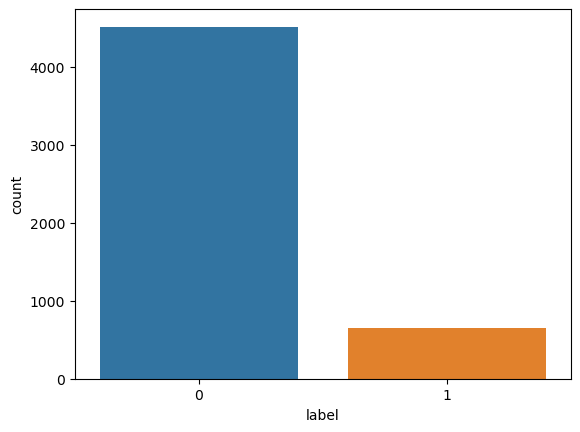

In [34]:
sns.countplot(sms['label'])
plt.savefig("dist")
plt.show()

In [35]:
data_ham = sms[sms['label'] == 0].copy()
data_spam = sms[sms['label'] == 1].copy()

def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color='white', colormap='viridis', width=800, height=600).generate(text)
    plt.figure(figsize=(10,7))
    plt.imshow(fig_wordcloud)
    plt.title(title)
    plt.axis('off')
    plt.show()

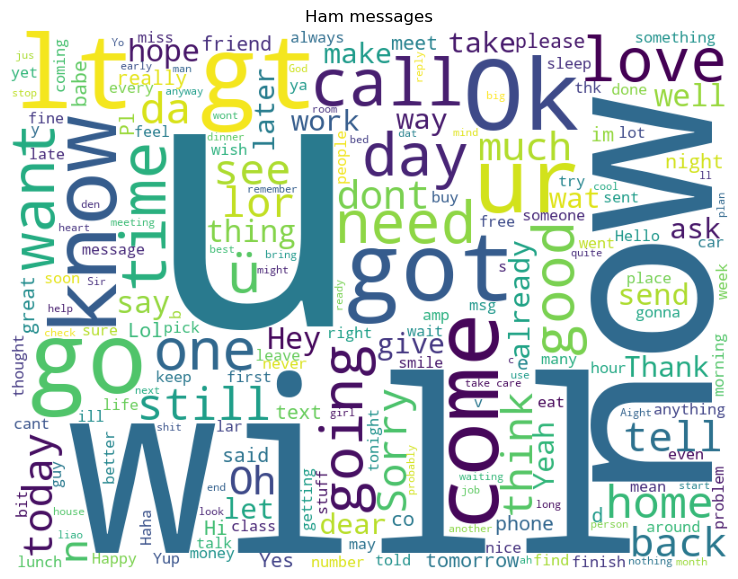

In [36]:
show_wordcloud(data_ham, "Ham messages")

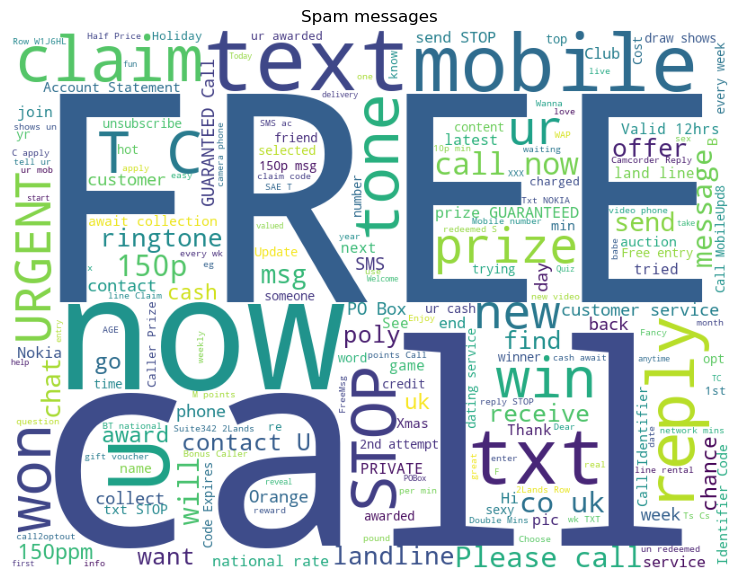

In [37]:
show_wordcloud(data_spam, "Spam messages")

In [47]:
corpus = []
ps = PorterStemmer()

for i in range(0,sms.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms.message[i]) #Cleaning special character from the message
    message = message.lower() #Converting the entire message into lower case
    words = message.split() # Tokenizing the review by words
    words = [word for word in words if word not in set(stopwords.words('english'))] #Removing the stop words
    words = [ps.stem(word) for word in words] #Stemming the words
    message = ' '.join(words) #Joining the stemmed words
    corpus.append(message) #Building a corpus of messages

print(corpus[0:10])
print(len(corpus))

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun', 'winner valu network custom select receivea prize reward claim call claim code kl valid hour', 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']
5169


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y = pd.get_dummies(sms['label'])
y = y.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [49]:
tuned_parameters = {'kernel':['linear', 'rbf'], 'gamma':[1e-3, 1e-4], 'C':[1,10,100,1000]}
 
classifier = GridSearchCV(SVC(), tuned_parameters)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy Score {}".format(accuracy_score(y_test, y_pred)))
print("Classification Report")
print(classification_report(y_test, y_pred))

Accuracy Score 0.9806576402321083
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.97      0.88      0.92       138

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [51]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

print(predict_spam("hot babe in your area"))

[0]
